In [139]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()


# Import Data

In [140]:
FF = pd.read_csv('2020 Fantasy Football.csv')
pd.set_option('display.max_columns', None)
FF

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
0,1,Derrick Henry *+,TEN,RB,26,16,16,0,0,0,0,0,378,2027,5.36,17,31,19,114,6.00,0,3,2,17,1.0,NaN,314.0,333.1,341.1,323.6,184.0,1,1.0
1,2,Alvin Kamara *,NOR,RB,25,15,10,0,0,0,0,0,187,932,4.98,16,107,83,756,9.11,5,1,0,21,NaN,NaN,295.0,377.8,383.8,336.3,165.0,2,2.0
2,3,Dalvin Cook*,MIN,RB,25,14,14,0,0,0,0,0,312,1557,4.99,16,54,44,361,8.20,1,5,3,17,3.0,NaN,294.0,337.8,346.8,315.8,164.0,3,3.0
3,4,Travis Kelce*+,KAN,TE,31,15,15,1,2,4,0,0,0,0,NaN,0,145,105,1416,13.49,11,1,1,11,1.0,NaN,208.0,312.8,316.8,260.3,117.0,1,4.0
4,5,Davante Adams*+,GNB,WR,28,14,14,0,0,0,0,0,0,0,NaN,0,149,115,1374,11.95,18,1,1,18,NaN,NaN,243.0,358.4,362.4,300.9,117.0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,Alex Armah,CAR,RB,26,16,1,0,0,0,0,0,6,9,1.50,0,9,5,18,3.60,0,0,0,0,NaN,NaN,3.0,7.7,7.7,5.2,NaN,143,NaN
495,496,Daniel Brown,NYJ,WR,28,16,1,0,0,0,0,0,0,0,NaN,0,2,2,31,15.50,0,0,0,0,NaN,NaN,3.0,5.1,5.1,4.1,NaN,195,NaN
496,497,Stephen Carlson,CLE,TE,24,16,2,0,0,0,0,0,0,0,NaN,0,2,1,11,11.00,0,0,0,0,1.0,NaN,3.0,4.1,4.1,3.6,NaN,96,NaN
497,498,Ben Ellefson,JAX,TE,24,7,4,0,0,0,0,0,0,0,NaN,0,4,1,10,10.00,0,0,0,0,1.0,NaN,3.0,4.0,4.0,3.5,NaN,97,NaN


# Clean Data

In [141]:
#Drop uneccessary columns
FF.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS','VBD'], axis=1, inplace=True)


In [142]:
FF.head(3)

,Player,Tm,FantPos,Age,G,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,FL,TD.3
0,Derrick Henry *+,TEN,RB,26,16,0,0,0,0,0,378,2027,5.36,17,31,19,114,6.00,0,2,17
1,Alvin Kamara *,NOR,RB,25,15,0,0,0,0,0,187,932,4.98,16,107,83,756,9.11,5,0,21
2,Dalvin Cook*,MIN,RB,25,14,0,0,0,0,0,312,1557,4.99,16,54,44,361,8.20,1,3,17


In [143]:
#Fix player name (Remove * and dashes)
FF['Player'] = FF['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])


#Rename columns for clarity
FF.rename({
    'TD': 'Passing TD',
    'TD.1': 'Rushing TD',
    'TD.2': 'Receiving TD',
    'TD.3': 'Total TD',
    'Yds': 'Passing Yards',
    'Yds.1': 'Rushing Yards',
    'Yds.2': 'Receiving Yards',
    'Att': 'Passing Att',
    'Att.1': 'Rushing Att',
    'FantPos': 'Position',
    'Tm': 'Team'
}, axis=1, inplace=True)



# Creating New Data Frames

In [144]:
#Separate Dataframe by Position

RB_DF = FF[FF['Position'] == 'RB']
QB_DF = FF[FF['Position'] == 'QB']
WR_DF = FF[FF['Position'] == 'WR']
TE_DF = FF[FF['Position'] == 'TE']



In [145]:
#Creating data frames to include Player, Team, Games, Fumbles Lost, and Age

Rush_Col = ['Rushing Att', 'Rushing Yards', 'Y/A','Rushing TD']
Rec_Col = ['Tgt','Rec', 'Receiving Yards', 'Y/R','Receiving TD']
Pass_Col = ['Passing Att', 'Passing Yards', 'Passing TD', 'Int']

def transform_col(FF, new_column_list):
    FF = FF[['Player','Team', 'Age', 'G'] + new_column_list + ['FL']]
    return FF


In [146]:
RB_DF = transform_col(RB_DF, Rush_Col + Rec_Col)
WR_DF = transform_col(WR_DF, Rush_Col + Rec_Col)
TE_DF = transform_col(TE_DF, Rec_Col)
QB_DF = transform_col(QB_DF, Pass_Col)


# Creating New Columns for the RB Dataframe

In [168]:
#Creating Column for total Fantasy Points Scored
RB_DF['Fantasy Points'] = (RB_DF['Rushing Att']*0.3 + RB_DF['Rushing Yards']*0.1 + RB_DF['Rushing TD']*6 + RB_DF['Rec']*0.8 + RB_DF['Receiving Yards']*0.1 + RB_DF['Receiving TD']*6 - RB_DF['FL']*2)           

#Creating Column for Fantasty Points Per Game
RB_DF['Fantasy Points/Game'] = RB_DF['Fantasy Points'] / RB_DF['G']
RB_DF['Fantasy Points/Game'] = RB_DF['Fantasy Points/Game'].apply(lambda x: round(x,2))

#Creating column for usage per game
RB_DF['Usage/Game'] = (RB_DF['Rushing Att'] + RB_DF['Tgt'])/RB_DF['G']
RB_DF['Usage/Game'] = RB_DF['Usage/Game'].apply(lambda x: round(x,2))

#Creating new column for TD/Usage
RB_DF['Total TD/Usage'] = (RB_DF['Rushing TD']+RB_DF['Receiving TD']) / (RB_DF['Rushing Att']+RB_DF['Tgt'])
RB_DF['Total TD/Usage'] = RB_DF['Total TD/Usage'].apply(lambda x: round(x,2))

#Creating new column for Total yards / Attempt+ Targets
RB_DF['Total Yards/Usage'] = (RB_DF['Rushing Yards'] + RB_DF['Receiving Yards']) / (RB_DF['Rushing Att']+RB_DF['Tgt'])
RB_DF['Total Yards/Usage'] = RB_DF['Total Yards/Usage'].apply(lambda x: round(x,2))



# Creating Plot For Usage/Game VS Fantasy PPG

How does Efficiency relate to performance in Fantasy Football at the Running Back Position?

Later we will compare thes stats to the WR position.


# Scatter Plot for Fantasy PPG vs Usage/Game at the RB Position

Text(0, 0.5, 'Fantasy PPG')

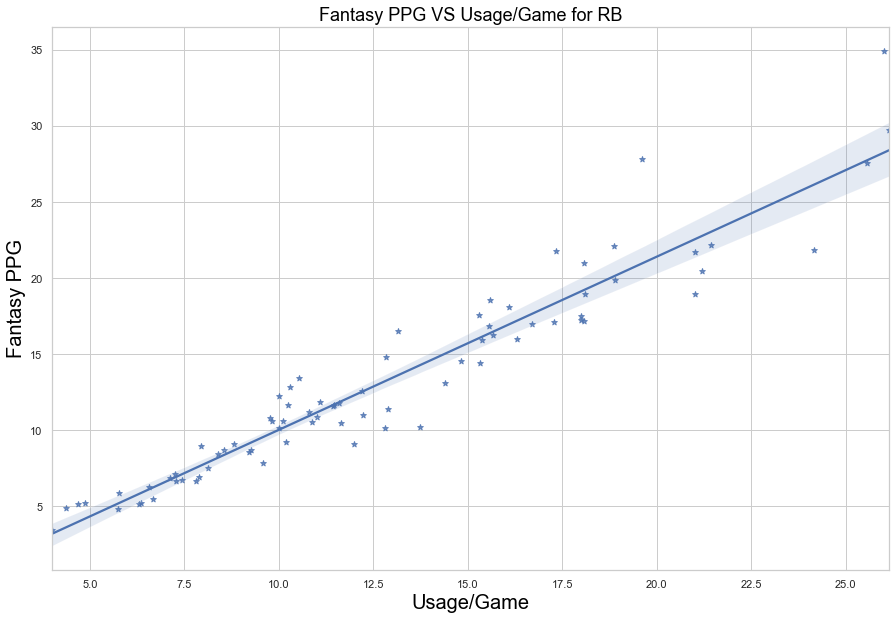

In [170]:
sns.set_style('whitegrid')

# Create a canvas with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

# Basic regression scatter plot with trendline
plot = sns.regplot(
    x = RB_DF['Usage/Game'], 
    y = RB_DF['Fantasy Points/Game'],
    marker = '*',
    scatter=True,)

plt.title('Fantasy PPG VS Usage/Game for RB', size=18, c='Black')
plt.xlabel('Usage/Game', size = 20, c = 'Black')
plt.ylabel('Fantasy PPG', size = 20, c = 'Black')

# Creating Scatter Plot for TD/Usage vs Fantasy PPG

Text(0, 0.5, 'Fantasy PPG')

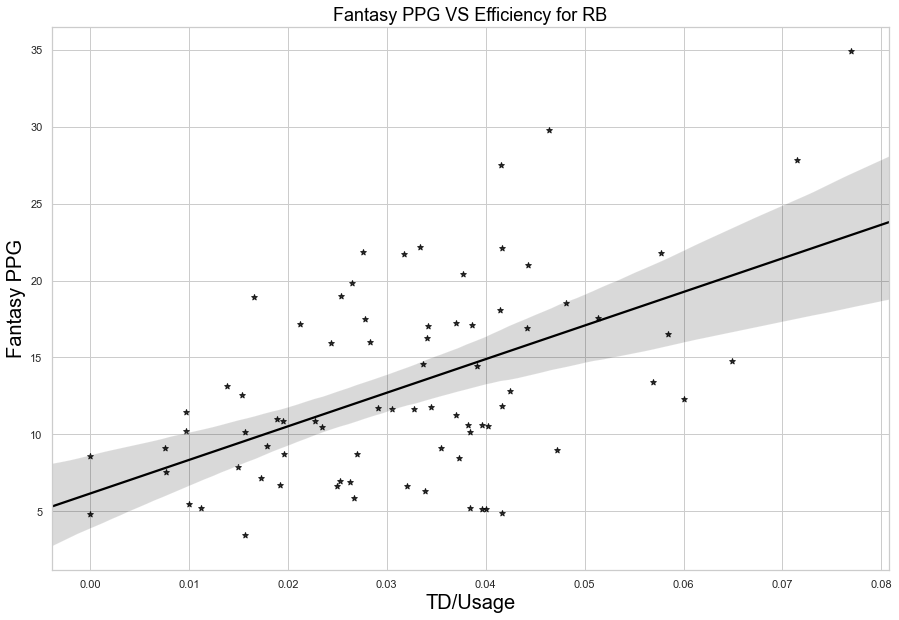

In [166]:
sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

RB_DF = RB_DF[RB_DF['Rushing Att'] > 40]

plot = sns.regplot(
    x = RB_DF['TD/Usage'],
    y = RB_DF['Fantasy Points/Game'],
    color='Black',
    marker="*",
    truncate = False,
    scatter=True)
plt.title('Fantasy PPG VS Efficiency for RB', size=18, c='Black')
plt.xlabel('TD/Usage', size = 20, c = 'Black')
plt.ylabel('Fantasy PPG', size = 20, c = 'Black')



#I am calling TD/Usage "Efficiency"


Text(0, 0.5, 'Fantasy PPG')

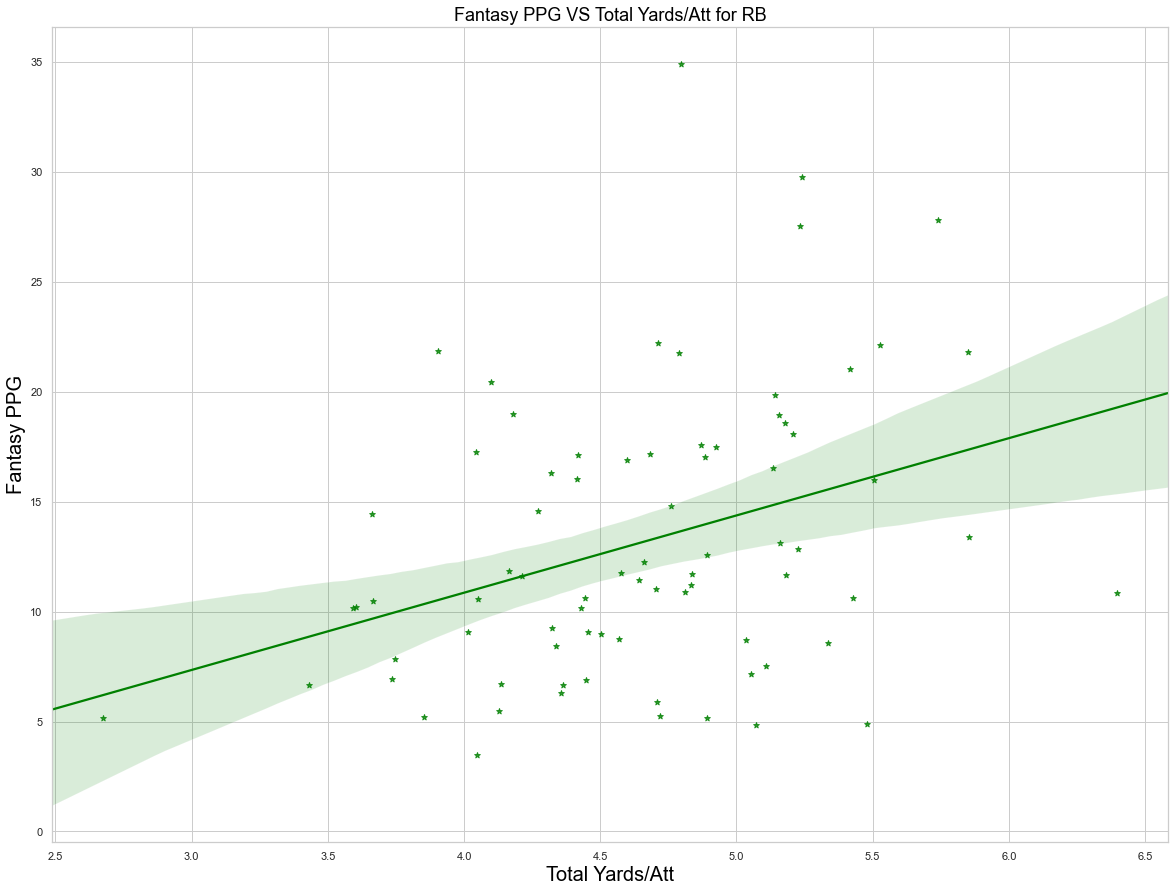

In [167]:
#Creating a scatter plot for Fantasy PPG vs Yards/Usage

sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(20, 15)

RB_DF = RB_DF[RB_DF['Rushing Att'] > 20]

plot = sns.regplot(
    x = RB_DF['Total Yards/Att'],
    y = RB_DF['Fantasy Points/Game'],
    color='Green',
    marker="*",
    truncate = False,
    scatter=True)
plt.title('Fantasy PPG VS Total Yards/Att for RB', size=18, c='Black')
plt.xlabel('Total Yards/Att', size = 20, c = 'Black')
plt.ylabel('Fantasy PPG', size = 20, c = 'Black')


We see there is not much correlation between Fantasy Points per Game and TD/Usage (efficiency)

In [152]:
#Sort by Fantasy Points Per Game

Sort_by_PPG = RB_DF.sort_values('Fantasy Points/Game',ascending=False)
Sort_by_PPG.head()

,Player,Team,Age,G,Rushing Att,Rushing Yards,Y/A,Rushing TD,Tgt,Rec,Receiving Yards,Y/R,Receiving TD,FL,Fantasy Points,Fantasy Points/Game,Usage/Game,TD/Usage,Total Yards/Att
171,Christian McCaffrey,CAR,24,3,59,225,3.81,5,19,17,149,8.76,1,0,104.7,34.90,26.00,0.076923,4.794872
2,Dalvin Cook,MIN,25,14,312,1557,4.99,16,54,44,361,8.20,1,3,416.6,29.76,26.14,0.046448,5.240437
1,Alvin Kamara,NOR,25,15,187,932,4.98,16,107,83,756,9.11,5,0,417.3,27.82,19.60,0.071429,5.741497
0,Derrick Henry,TEN,26,16,378,2027,5.36,17,31,19,114,6.00,0,2,440.7,27.54,25.56,0.041565,5.234719
17,James Robinson,JAX,22,14,240,1070,4.46,7,60,49,344,7.02,3,1,310.6,22.19,21.43,0.033333,4.713333


In [153]:
#Sort by Usage/Game

Sort_by_Usage = RB_DF.sort_values('Usage/Game',ascending=False)
Sort_by_Usage.head()


,Player,Team,Age,G,Rushing Att,Rushing Yards,Y/A,Rushing TD,Tgt,Rec,Receiving Yards,Y/R,Receiving TD,FL,Fantasy Points,Fantasy Points/Game,Usage/Game,TD/Usage,Total Yards/Att
2,Dalvin Cook,MIN,25,14,312,1557,4.99,16,54,44,361,8.20,1,3,416.6,29.76,26.14,0.046448,5.240437
171,Christian McCaffrey,CAR,24,3,59,225,3.81,5,19,17,149,8.76,1,0,104.7,34.90,26.00,0.076923,4.794872
0,Derrick Henry,TEN,26,16,378,2027,5.36,17,31,19,114,6.00,0,2,440.7,27.54,25.56,0.041565,5.234719
165,Joe Mixon,CIN,24,6,119,428,3.60,3,26,21,138,6.57,1,1,131.1,21.85,24.17,0.027586,3.903448
17,James Robinson,JAX,22,14,240,1070,4.46,7,60,49,344,7.02,3,1,310.6,22.19,21.43,0.033333,4.713333


In [154]:
#Sort by Total Points Scored

Sort_by_Total_Points = RB_DF.sort_values('Fantasy Points',ascending=False)
Sort_by_Total_Points.head()


,Player,Team,Age,G,Rushing Att,Rushing Yards,Y/A,Rushing TD,Tgt,Rec,Receiving Yards,Y/R,Receiving TD,FL,Fantasy Points,Fantasy Points/Game,Usage/Game,TD/Usage,Total Yards/Att
0,Derrick Henry,TEN,26,16,378,2027,5.36,17,31,19,114,6.00,0,2,440.7,27.54,25.56,0.041565,5.234719
1,Alvin Kamara,NOR,25,15,187,932,4.98,16,107,83,756,9.11,5,0,417.3,27.82,19.60,0.071429,5.741497
2,Dalvin Cook,MIN,25,14,312,1557,4.99,16,54,44,361,8.20,1,3,416.6,29.76,26.14,0.046448,5.240437
14,David Montgomery,CHI,23,15,247,1070,4.33,8,68,54,438,8.11,2,1,326.1,21.74,21.00,0.031746,4.787302
11,Jonathan Taylor,IND,21,15,232,1169,5.04,11,39,36,299,8.31,1,1,315.2,21.01,18.07,0.044280,5.416974


# Creating New Columns for WR

In [161]:
#Creating Column for total Fantasy Points Scored
WR_DF['Fantasy Points'] = (WR_DF['Rushing Att']*0.3 + WR_DF['Rushing Yards']*0.1 + WR_DF['Rushing TD']*6 + WR_DF['Rec']*0.8 + WR_DF['Receiving Yards']*0.1 + WR_DF['Receiving TD']*6 - WR_DF['FL']*2)           

#Creating Column for Fantasty Points Per Game
WR_DF['Fantasy Points/Game'] = WR_DF['Fantasy Points'] / WR_DF['G']
WR_DF['Fantasy Points/Game'] = WR_DF['Fantasy Points/Game'].apply(lambda x: round(x,2))


#Creating column for usage per game
WR_DF['Usage/Game'] = (WR_DF['Rushing Att'] + WR_DF['Tgt'])/ WR_DF['G']
WR_DF['Usage/Game'] = WR_DF['Usage/Game'].apply(lambda x: round(x,2))

#Creating new column for Total yards / Attempt+ Targets
WR_DF['Total Yards/Att'] = (WR_DF['Rushing Yards'] + WR_DF['Receiving Yards']) / (WR_DF['Rushing Att'] + WR_DF['Tgt'])

#Creating new column for TD/Usage
WR_DF['TD/Usage'] = (WR_DF['Rushing TD']+WR_DF['Receiving TD']) / (WR_DF['Rushing Att']+WR_DF['Tgt'])



In [156]:
#Sorting by Total Fantasy Points

Sort_by_PPG_WR = WR_DF.sort_values('Fantasy Points/Game',ascending=False)
Sort_by_PPG_WR.head()

,Player,Team,Age,G,Rushing Att,Rushing Yards,Y/A,Rushing TD,Tgt,Rec,Receiving Yards,Y/R,Receiving TD,FL,Fantasy Points,Fantasy Points/Game,Usage/Game,Yards/Att,TD/Usage
4,Davante Adams,GNB,28,14,0,0,NaN,0,149,115,1374,11.95,18,1,335.4,23.96,10.64,9.221477,0.120805
5,Tyreek Hill,KAN,26,15,13,123,9.46,2,135,87,1276,14.67,15,0,315.4,21.03,9.87,9.452703,0.114865
16,Stefon Diggs,BUF,27,16,1,1,1.00,0,166,127,1535,12.09,8,0,303.5,18.97,10.44,9.197605,0.047904
19,Calvin Ridley,ATL,26,15,5,1,0.20,0,143,90,1374,15.27,9,1,263.0,17.53,9.87,9.290541,0.060811
31,DeAndre Hopkins,ARI,28,16,1,1,1.00,0,160,115,1407,12.23,6,2,265.1,16.57,10.06,8.745342,0.037267


# Creating Scatter Plot to show correlation between Usage and Fantasy PPG

Text(0, 0.5, 'Fantasy PPG')

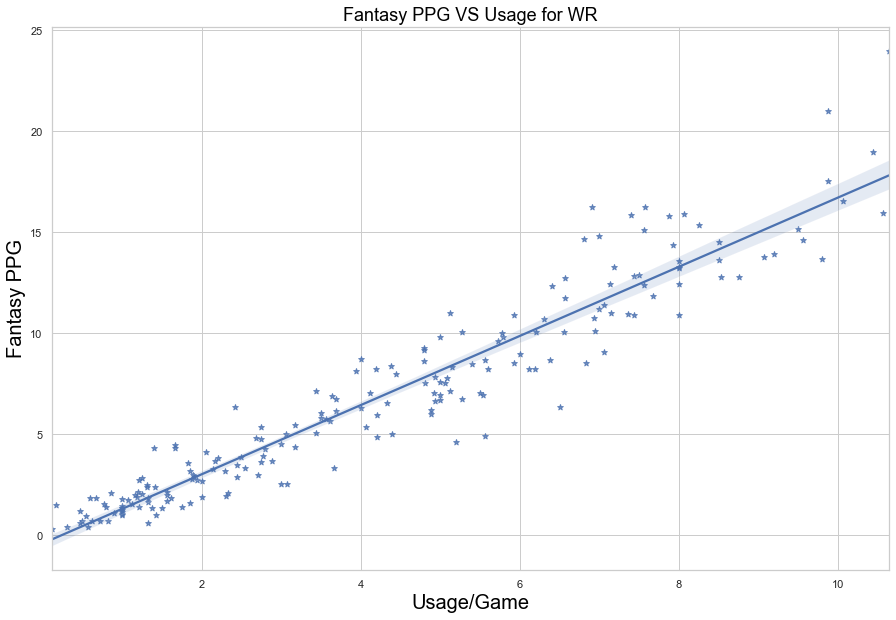

In [157]:
sns.set_style('whitegrid')

# Create a canvas with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

# Basic regression scatter plot with trendline
plot = sns.regplot(
    x = WR_DF['Usage/Game'], 
    y = WR_DF['Fantasy Points/Game'],
    marker = '*',
    scatter=True,)

plt.title('Fantasy PPG VS Usage for WR', size=18, c='Black')
plt.xlabel('Usage/Game', size = 20, c = 'Black')
plt.ylabel('Fantasy PPG', size = 20, c = 'Black')

# Creating Scatter Plot for PPG vs Yards/Att

Text(0, 0.5, 'Fantasy PPG')

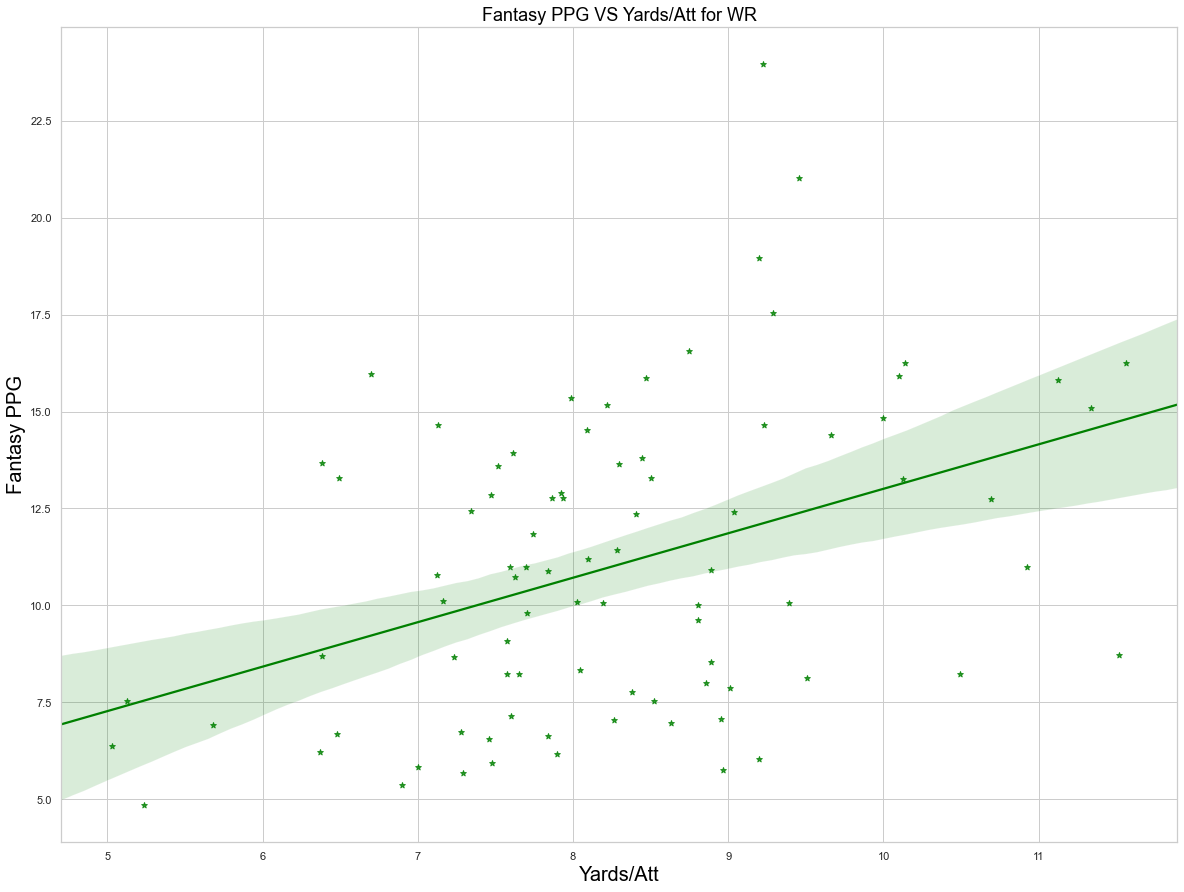

In [158]:


sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(20, 15)

WR_DF = WR_DF[WR_DF['Tgt'] > 50]

plot = sns.regplot(
    x = WR_DF['Yards/Att'],
    y = WR_DF['Fantasy Points/Game'],
    color='Green',
    marker="*",
    truncate = False,
    scatter=True)
plt.title('Fantasy PPG VS Yards/Att for WR', size=18, c='Black')
plt.xlabel('Yards/Att', size = 20, c = 'Black')
plt.ylabel('Fantasy PPG', size = 20, c = 'Black')

# Scatter Plot for Targets vs Total Fantasy Points

Text(0, 0.5, 'Total Fantasy Points')

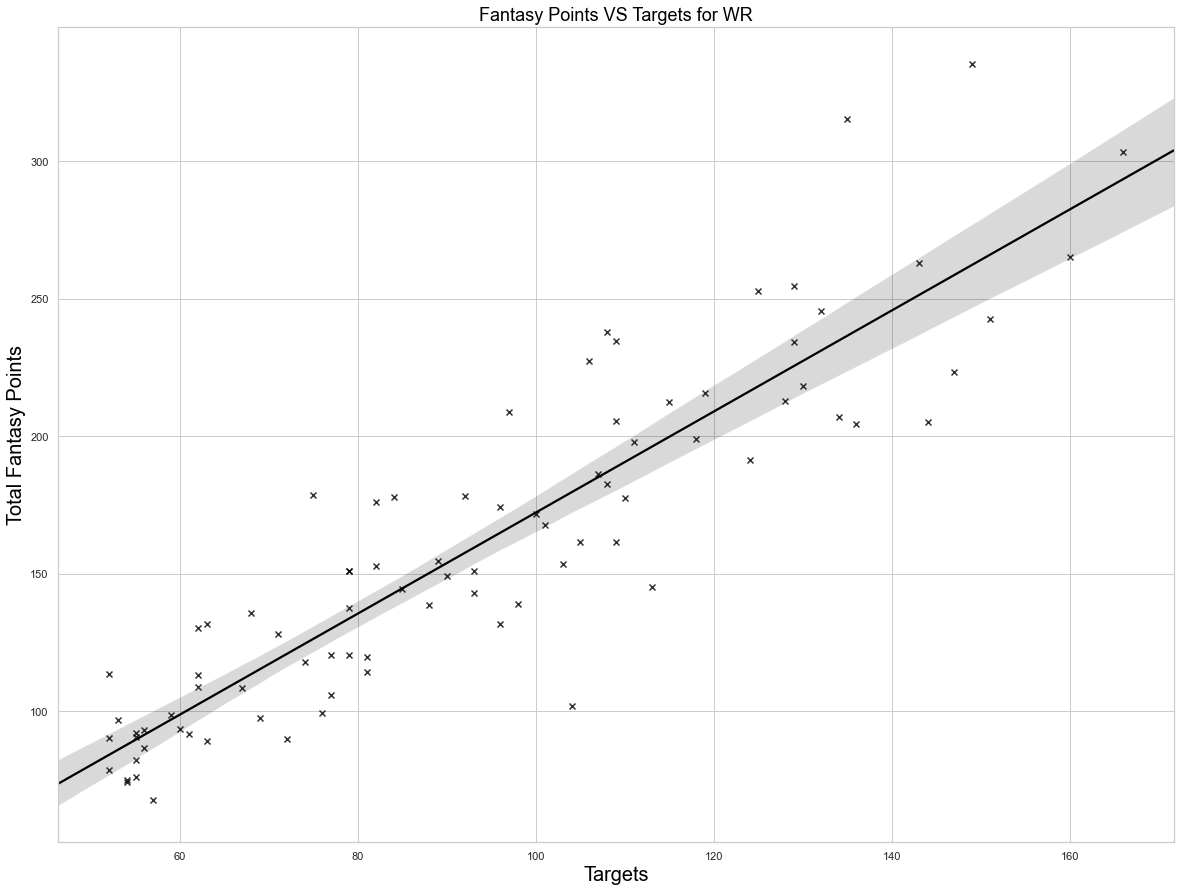

In [172]:
#Creating a scatter plot for Fantasy PPG vs Yards/Usage

sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(20, 15)

#Making sure we have a large enough sample size
WR_DF = WR_DF[WR_DF['Tgt'] > 50]

plot = sns.regplot(
    x = WR_DF['Tgt'],
    y = WR_DF['Fantasy Points'],
    color='Black',
    marker="x",
    truncate = False,
    scatter=True)
plt.title('Fantasy Points VS Targets for WR', size=18, c='Black')
plt.xlabel('Targets', size = 20, c = 'Black')
plt.ylabel('Total Fantasy Points', size = 20, c = 'Black')

# Conclusions

I found it was much more important to have a player that gets a lot of volume of targets and rush attempts compared to being efficient. Players who get more volume get more points per game in fantasy, therefor having a player with a higher usage increases your chances at winning in Fantasy Football.